We want to see the **trend of transportation** for travelling in Europe for the last five years.

## 1. Tourism Trend in Transportation Method

### Import libraries

In [1]:
import pandas as pd
pd.set_option("display.max_rows", 101)

### Data preprocessing

In [2]:
# read original data from csv file
ori_data = pd.read_csv('data/tour_dem_tttr_1_Data.csv')
ori_data

,TIME,GEO,UNIT,PURPOSE,DURATION,PARTNER,TRA_MODE,Value,Flag and Footnotes
0,2014,Belgium,Number,Total,1 night or over,Domestic,Total,"2,253,573",NaN
1,2014,Belgium,Number,Total,1 night or over,Domestic,Air,:,NaN
2,2014,Belgium,Number,Total,1 night or over,Domestic,Land,"2,250,733",NaN
3,2014,Belgium,Number,Total,1 night or over,Domestic,Railways,"192,750",NaN
4,2014,Belgium,Number,Total,1 night or over,Domestic,"Bus, coach","47,937",u
...,...,...,...,...,...,...,...,...,...
26455,2018,Switzerland,Number,"Professional, business",4 nights or over,All countries of the world,Land,"136,167",u
26456,2018,Switzerland,Number,"Professional, business",4 nights or over,All countries of the world,Railways,:,c
26457,2018,Switzerland,Number,"Professional, business",4 nights or over,All countries of the world,"Bus, coach",:,c
26458,2018,Switzerland,Number,"Professional, business",4 nights or over,All countries of the world,Motor vehicle,:,c


In [3]:
# rename columns
ori_data.columns = ['Time', 'Country', 'Unit', 'Purpose', 'Duration', 'Partner', 'Transportation', 'NumTrip', 'Flag']

In [4]:
# remove rows with missing NumTrip
data = ori_data[ori_data.NumTrip != ":"]
data.head()

,Time,Country,Unit,Purpose,Duration,Partner,Transportation,NumTrip,Flag
0,2014,Belgium,Number,Total,1 night or over,Domestic,Total,"2,253,573",NaN
2,2014,Belgium,Number,Total,1 night or over,Domestic,Land,"2,250,733",NaN
3,2014,Belgium,Number,Total,1 night or over,Domestic,Railways,"192,750",NaN
4,2014,Belgium,Number,Total,1 night or over,Domestic,"Bus, coach","47,937",u
5,2014,Belgium,Number,Total,1 night or over,Domestic,Motor vehicle,"1,993,400",NaN


In [5]:
# make NumTrip to int
data['NumTrip'] = data['NumTrip'].apply(lambda x: int(x.replace(",", "")))
data.head()

/home/mdcai/Anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Time,Country,Unit,Purpose,Duration,Partner,Transportation,NumTrip,Flag
0,2014,Belgium,Number,Total,1 night or over,Domestic,Total,2253573,NaN
2,2014,Belgium,Number,Total,1 night or over,Domestic,Land,2250733,NaN
3,2014,Belgium,Number,Total,1 night or over,Domestic,Railways,192750,NaN
4,2014,Belgium,Number,Total,1 night or over,Domestic,"Bus, coach",47937,u
5,2014,Belgium,Number,Total,1 night or over,Domestic,Motor vehicle,1993400,NaN


### Data exploration

We want to see the trend of transportation for travelling in Europe for the last five years. \
Starting by exploring the data, we want to see whether people use **airplane** more frequently now compared with past. \
We will generalize the question to all other kinds of transportation in the next milestone. \
Our assumption to the question is yes.

In [6]:
# data_total => all columns with category refers to the sum of NumTrip
data_total = data[data.Purpose == "Total"]
data_total = data_total[data_total.Duration == "1 night or over"]
data_total = data_total[data_total.Partner == "All countries of the world"]

In [7]:
data_total

,Time,Country,Unit,Purpose,Duration,Partner,Transportation,NumTrip,Flag
14,2014,Belgium,Number,Total,1 night or over,All countries of the world,Total,13031273,NaN
15,2014,Belgium,Number,Total,1 night or over,All countries of the world,Air,3962198,NaN
16,2014,Belgium,Number,Total,1 night or over,All countries of the world,Land,8977574,NaN
17,2014,Belgium,Number,Total,1 night or over,All countries of the world,Railways,839525,NaN
18,2014,Belgium,Number,Total,1 night or over,All countries of the world,"Bus, coach",562748,NaN
...,...,...,...,...,...,...,...,...,...
26287,2018,Switzerland,Number,Total,1 night or over,All countries of the world,Land,14911363,NaN
26288,2018,Switzerland,Number,Total,1 night or over,All countries of the world,Railways,3665052,NaN
26289,2018,Switzerland,Number,Total,1 night or over,All countries of the world,"Bus, coach",625409,NaN
26290,2018,Switzerland,Number,Total,1 night or over,All countries of the world,Motor vehicle,10541815,NaN


In [8]:
# data_total_total => NumTrip by all kinds of transportation in data_total dataframe
data_total_total = data_total[data_total.Transportation == "Total"]
data_total_total.shape

(138, 9)

In [9]:
# data_air => NumTrip by "air" only in data_total dataframe
data_air = data_total[data_total.Transportation == "Air"]
data_air.shape

(138, 9)

In [10]:
data_air_sum = data_air.groupby('Time').NumTrip.agg('sum')

In [11]:
data_air_sum

Time
2014    145012772
2015    143818376
2016    154376514
2017    170506158
2018    196369808
Name: NumTrip, dtype: int64

In [12]:
data_total_sum = data_total_total.groupby('Time').NumTrip.agg('sum')

In [13]:
data_total_sum

Time
2014    1028189581
2015    1015389696
2016    1047258292
2017    1082257223
2018    1049299929
Name: NumTrip, dtype: int64

In [14]:
data_air_vs_total = pd.concat([data_total_sum, data_air_sum], axis=1)

In [15]:
data_air_vs_total.columns = ['Total', 'Air']

In [16]:
data_air_vs_total

,Total,Air
Time,,
2014,1028189581,145012772
2015,1015389696,143818376
2016,1047258292,154376514
2017,1082257223,170506158
2018,1049299929,196369808


In [17]:
data_air_vs_total['Percentage'] = data_air_vs_total.apply(lambda row: row['Air'] / row['Total'], axis=1)

In [18]:
data_air_vs_total

,Total,Air,Percentage
Time,,,
2014,1028189581,145012772,0.141037
2015,1015389696,143818376,0.141639
2016,1047258292,154376514,0.147410
2017,1082257223,170506158,0.157547
2018,1049299929,196369808,0.187144


### Date visualization

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.plot(data_air_vs_total.Percentage)
plt.xlabel("year", fontsize=20)
plt.ylabel("percentage", fontsize=20)
plt.title("Number of trips by airplane over all travel modes", fontsize=20)
plt.show()

<Figure size 2000x1000 with 1 Axes>

### What to do in the next milestone
* Analyze trips in Europe by means of all transportations (not only by airplane)
* Analyze the trend of trip purpose (personal vs business, etc)

In [20]:


# data_transportation_sum_by_year = data_countries.groupby(['TIME']).Value.agg('sum')

# data_transportation = data_countries.groupby(['TIME', 'TRA_MODE']).apply(lambda x: sum(x.Value))

# data_transportation

# all_tra_mode_sum = [x.iloc[0].Value + x.iloc[1].Value + x.iloc[2].Value for x in data_transportation]

# for i in range(2014, 2019):
#     all_tra_mode_sum.append()

# data_transportation_list = []
# for year in range(2014, 2019):
#     data_year = data_countries[data_countries.TIME == year]
#     data_year_transportation = data_year.groupby('TRA_MODE').apply(lambda x: sum(x.Value))
#     data_year_transportation_df = data_year_transportation.to_frame()
#     data_year_transportation_df = data_year_transportation_df.rename(columns={0:'Value'})
# #     data_year_transportation_df['Percentage'] = data_year_transportation_df['Value'].apply(lambda x: 100 * x / data_transportation_sum_by_year.values[year - 2009])    
#     data_transportation_list.append(data_year_transportation_df)



# air_values = [x.iloc[0].Value for x in data_transportation_list]

# air_values



## 2. Tourism Trend in Destination's Purchase Power

Next, we would like to explore whether a person's living condition affects his or her willlingness to participate in tourism. Specifically, we would like to compare people based on how developed their home country is.
Price Level Index(PLI), also known as Consumer Price Index(CPI), generally gives great indication of how developed a nation is. Here we extracted a list of European Union(EU) countries PLI with reference to EU 28 nations average. Thus, countries with PLI higher than 100 are considered more developed than EU 28 average, and ones with lower PLI are less developed.

### Import Libraries

In [21]:
import pandas as pd
pd.set_option("display.max_rows", 101)

### Data preprocessing

In [22]:
# read original data from tsv file
raw_prc_ppp = pd.read_csv('data/prc_ppp_ind.tsv', sep='\t', dtype=str)
raw_prc_ppp.rename(columns={ raw_prc_ppp.columns[0]: "Country" }, inplace = True)
raw_prc_ppp = raw_prc_ppp.rename(columns=lambda x: x.strip())
raw_prc_ppp[['NA_ITEM','PPP_CAT', 'Country']] = raw_prc_ppp['Country'].str.split(',',expand=True)

raw_tour_toto = pd.read_csv('data/tour_dem_totot.tsv', sep='\t', dtype=str)
raw_tour_toto.rename(columns={ raw_tour_toto.columns[0]: "Country" }, inplace = True)
raw_tour_toto = raw_tour_toto.rename(columns=lambda x: x.strip())
raw_tour_toto[['Unit','Duration', 'Partner', 'Country']] = raw_tour_toto['Country'].str.split(',',expand=True)
raw_tour_toto

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2000,1999,1998,1997,1996,1995,1994,Unit,Duration,Partner
0,AT,:,4324150,4292276,4195713,4130375,4264321,4119170,:,:,...,:,:,:,:,:,:,:,NR,N1-3,WORLD
1,BE,3865563,3593973 b,3206234,2970031,2665112,2863748,2206533,:,:,...,:,:,:,:,:,:,:,NR,N1-3,WORLD
2,BG,1255204,1359755,1027332,1024039,1072023,656285,545011,:,:,...,:,:,:,:,:,:,:,NR,N1-3,WORLD
3,CH,4752932,4713670,4666464,4557444,4345410,4372054,4276835,:,:,...,:,:,:,:,:,:,:,NR,N1-3,WORLD
4,CY,283357 e,248715 e,274419 e,239165 e,246994 e,212165 e,303695 e,:,:,...,:,:,:,:,:,:,:,NR,N1-3,WORLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,RO,11.04,10.24,9.66,10.69,10.46,10.01,10.1,:,:,...,:,:,:,:,:,:,:,PC_POP,N_GE4,WORLD
634,SE,68.03,66.94 b,48.77,53.15,47.58,:,80.1,78.7,77.9,...,:,:,:,78.3,:,:,:,PC_POP,N_GE4,WORLD
635,SI,59.46,55.62,53.54,52.29,51.85 e,49.57 e,51.97,58.9,56.6,...,:,:,:,:,:,:,:,PC_POP,N_GE4,WORLD
636,SK,53.03,48.73,47.87,46.54,39,40.12 b,44.49,48.1,52.6,...,:,:,:,:,:,:,:,PC_POP,N_GE4,WORLD


We only want Price Level Indices of "Actual individual consumption" and with reference to "EU_28" average.

In [23]:
raw_prc_ppp = raw_prc_ppp[(raw_prc_ppp['NA_ITEM']=="PLI_EU28") & (raw_prc_ppp['PPP_CAT']=="A01") & (raw_prc_ppp['Country'].str.len()==2)]
raw_prc_ppp = raw_prc_ppp.drop(raw_prc_ppp.columns[raw_prc_ppp.apply(lambda col: col.str.contains(":").any())], axis=1)
raw_prc_ppp = raw_prc_ppp.drop(['NA_ITEM', 'PPP_CAT'], axis=1)
raw_prc_ppp = raw_prc_ppp.set_index('Country', drop=True)
raw_prc_ppp[raw_prc_ppp.columns] = raw_prc_ppp[raw_prc_ppp.columns].apply(pd.to_numeric, errors='coerce')

In [24]:
countries = raw_prc_ppp.index.intersection(raw_tour_toto['Country'])
raw_tour_toto = raw_tour_toto[(raw_tour_toto['Unit']=="PC_POP") & (raw_tour_toto['Partner']=="WORLD") & (raw_tour_toto['Country'].isin(countries)) & (raw_tour_toto['Duration']=='N_GE1')]
raw_tour_toto = raw_tour_toto.drop(raw_tour_toto.columns[raw_tour_toto.apply(lambda col: col.str.contains(":").all())], axis=1)
raw_tour_toto = raw_tour_toto.drop(['Unit', 'Partner', 'Duration'], axis=1)
raw_tour_toto = raw_tour_toto.set_index('Country', drop=True)
raw_tour_toto[raw_tour_toto.columns] = raw_tour_toto[raw_tour_toto.columns].apply(lambda col: col.str.extract('(\d+)', expand=False))
raw_tour_toto[raw_tour_toto.columns] = raw_tour_toto[raw_tour_toto.columns].apply(pd.to_numeric, errors='coerce')
raw_tour_toto = raw_tour_toto.dropna()
countries = raw_tour_toto.index
tourism_source = raw_tour_toto.transpose()
tourism_source = tourism_source.sort_index()
tourism_source


Country,BE,BG,CH,CY,CZ,DE,DK,EE,EL,ES,...,IT,LT,LU,MT,NL,PL,PT,RO,SI,SK
2012,49.0,18.0,85.0,75.0,75.0,77.0,73.0,60.0,37.0,53.0,...,48.0,51.0,81.0,48.0,85.0,47.0,36.0,21.0,63.0,54.0
2013,61.0,22.0,86.0,52.0,73.0,77.0,82.0,61.0,32.0,54.0,...,41.0,56.0,82.0,50.0,84.0,52.0,37.0,23.0,61.0,56.0
2014,55.0,25.0,86.0,63.0,83.0,77.0,82.0,71.0,38.0,53.0,...,37.0,57.0,82.0,53.0,83.0,53.0,23.0,25.0,62.0,53.0
2015,56.0,28.0,87.0,67.0,80.0,77.0,78.0,66.0,36.0,62.0,...,41.0,58.0,82.0,51.0,83.0,54.0,24.0,26.0,62.0,60.0
2016,58.0,29.0,89.0,69.0,80.0,75.0,79.0,68.0,35.0,65.0,...,41.0,57.0,80.0,59.0,85.0,56.0,42.0,24.0,66.0,66.0
2017,64.0,34.0,89.0,68.0,81.0,72.0,70.0,67.0,39.0,65.0,...,41.0,57.0,81.0,64.0,85.0,59.0,42.0,26.0,65.0,70.0
2018,67.0,33.0,89.0,69.0,78.0,75.0,69.0,79.0,42.0,67.0,...,44.0,57.0,81.0,65.0,85.0,61.0,44.0,27.0,69.0,73.0


In [25]:
raw_prc_ppp = raw_prc_ppp[raw_prc_ppp.index.isin(countries)]
pci = raw_prc_ppp.transpose()
pci = pci.sort_index()
pci

Country,BE,BG,CH,CY,CZ,DE,DK,EE,EL,ES,...,IT,LT,LU,MT,NL,PL,PT,RO,SI,SK
2005,105.6,36.5,133.1,89.1,54.0,101.6,142.2,57.2,85.0,89.1,...,103.0,48.4,119.3,68.6,102.9,53.9,80.1,45.5,73.6,48.7
2006,106.2,39.1,128.4,90.1,58.0,101.1,139.5,61.2,85.5,89.2,...,102.1,51.3,118.0,71.1,102.3,55.8,79.6,48.5,74.5,52.2
2007,108.0,41.0,117.6,86.1,58.8,100.0,135.2,64.8,88.1,91.6,...,100.8,54.0,120.9,69.9,101.5,55.6,80.9,54.2,76.4,57.4
2008,111.1,44.7,122.9,89.1,67.7,102.2,138.4,68.8,90.4,94.7,...,101.3,59.6,123.9,73.9,104.2,62.6,83.0,53.7,80.2,63.3
2009,113.6,47.1,131.6,92.0,64.5,104.6,141.7,67.5,93.6,97.5,...,103.6,60.3,130.0,75.8,108.5,53.1,85.2,49.1,85.3,66.6
2010,111.9,45.7,146.4,94.6,66.6,103.1,140.0,66.0,95.4,98.7,...,100.4,57.8,136.5,76.6,112.3,55.2,85.0,46.9,84.3,62.5
2011,112.4,45.5,161.7,95.8,68.9,102.2,139.9,67.2,94.9,98.5,...,101.5,58.3,136.0,78.0,112.7,53.7,85.3,47.7,83.7,63.4
2012,111.5,45.0,160.6,96.0,66.9,101.1,140.0,67.6,91.9,95.8,...,101.1,58.0,135.8,78.0,111.3,52.1,82.7,45.6,81.8,63.4
2013,111.0,44.2,155.1,95.2,63.3,102.5,139.3,69.9,87.8,95.1,...,102.3,57.8,135.1,80.8,111.9,52.4,81.1,47.8,82.1,63.4
2014,108.9,42.6,153.0,92.0,58.3,101.5,138.5,69.9,83.8,92.7,...,102.6,56.9,135.7,80.5,111.9,52.5,80.4,47.6,81.5,63.3


### Data Exploration & Visualization

Text(0.5, 1.0, '2018 Countries PLI vs Residents Willingness in Tourism')

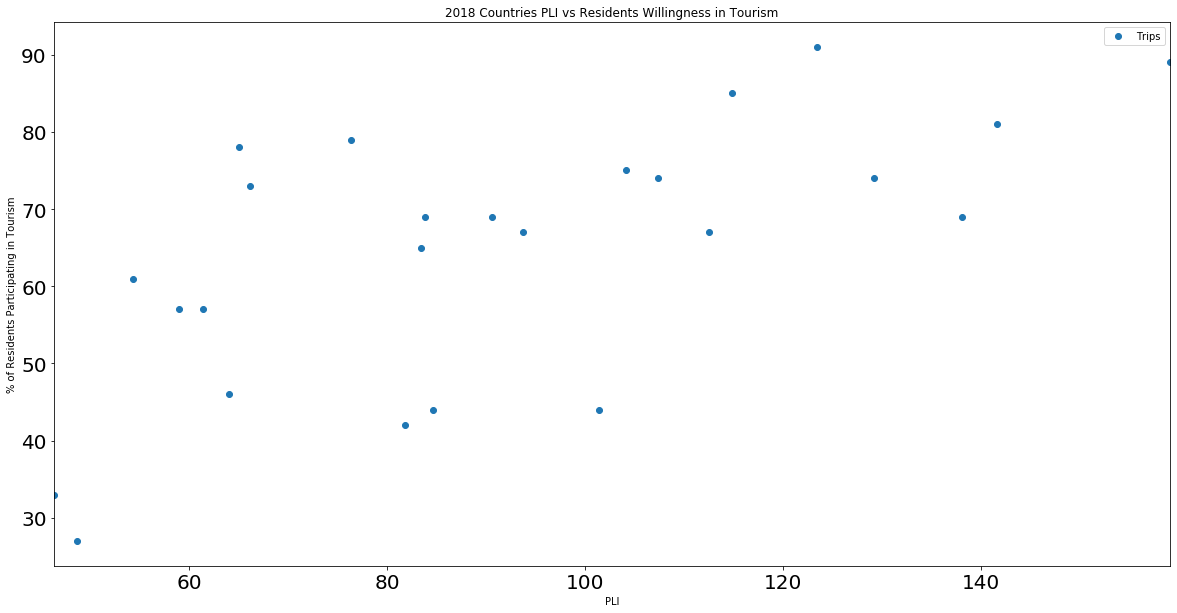

In [26]:
import matplotlib.pyplot as plt
tourism_source_2018 = tourism_source.loc[['2018'], :].transpose()
tourism_source_2018.rename(columns={ tourism_source_2018.columns[0]: "Trips" }, inplace = True)
pci_2018 = pci.loc[['2018'], :].transpose()
pci_2018.rename(columns={ pci_2018.columns[0]: "PCI" }, inplace = True)
overall_2018 = pd.merge(pci_2018, tourism_source_2018, left_index=True, right_index=True, how='inner')

overall_2018.plot(x='PCI', y='Trips', style='o', figsize=(20, 10))
plt.xlabel('PLI')
plt.ylabel('% of Residents Participating in Tourism')
plt.title('2018 Countries PLI vs Residents Willingness in Tourism')

Text(0.5, 1.0, '2017 Countries PLI vs Residents Willingness in Tourism')

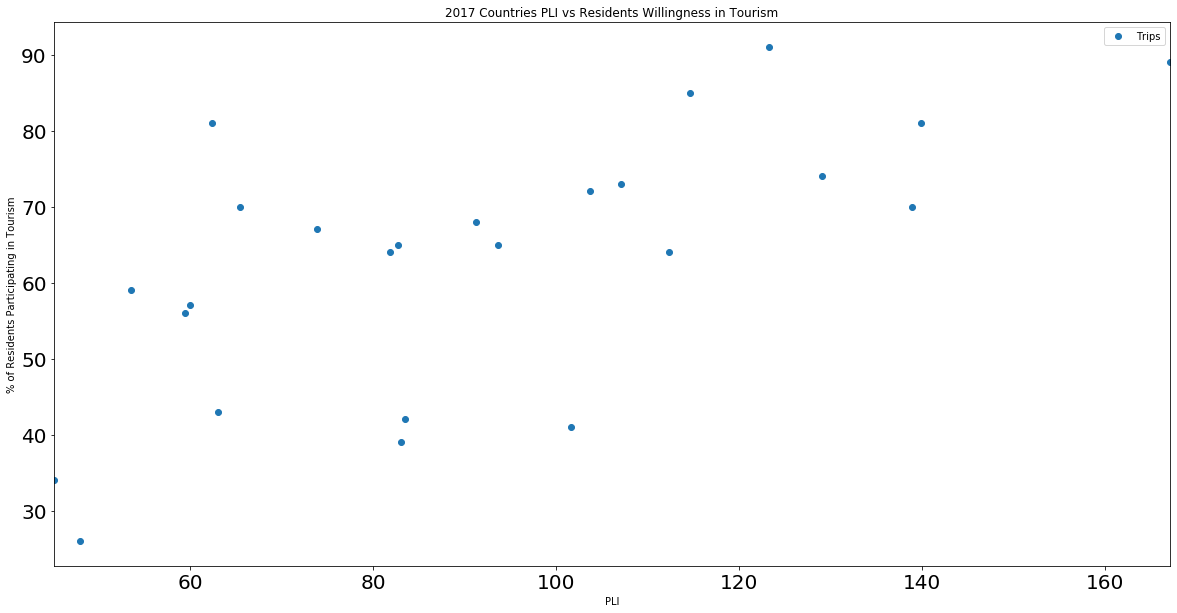

In [27]:
tourism_source_2017 = tourism_source.loc[['2017'], :].transpose()
tourism_source_2017.rename(columns={ tourism_source_2017.columns[0]: "Trips" }, inplace = True)
pci_2017 = pci.loc[['2017'], :].transpose()
pci_2017.rename(columns={ pci_2017.columns[0]: "PCI" }, inplace = True)
overall_2017 = pd.merge(pci_2017, tourism_source_2017, left_index=True, right_index=True, how='inner')

overall_2017.plot(x='PCI', y='Trips', style='o', figsize=(20, 10))
plt.xlabel('PLI')
plt.ylabel('% of Residents Participating in Tourism')
plt.title('2017 Countries PLI vs Residents Willingness in Tourism')

There seems to be a weak but visible correlation between how developed a country is and its residents willingness to participate in tourism. Both 2017 and 2018 graph suggests that, generally, residents in more developed countries are more willing to travel for personal purposes.

# Seasonal data trends

In [203]:
non_res_nights = pd.read_csv("data/tour_occ_nim.tsv.gz", delimiter="\t", index_col=[0], na_values=[': ', ":"]).T
non_res_nights.sort_index(inplace=True)
non_res_nights.index = non_res_nights.index.str.strip()
non_res_nights

"c_resid,unit,nace_r2,geo\time","FOR,NR,I551,AL","FOR,NR,I551,AT","FOR,NR,I551,BE","FOR,NR,I551,BG","FOR,NR,I551,CH","FOR,NR,I551,CY","FOR,NR,I551,CZ","FOR,NR,I551,DE","FOR,NR,I551,DK","FOR,NR,I551,EA",...,"TOTAL,PCH_SM,I553,NO","TOTAL,PCH_SM,I553,PL","TOTAL,PCH_SM,I553,PT","TOTAL,PCH_SM,I553,RO","TOTAL,PCH_SM,I553,RS","TOTAL,PCH_SM,I553,SE","TOTAL,PCH_SM,I553,SI","TOTAL,PCH_SM,I553,SK","TOTAL,PCH_SM,I553,TR","TOTAL,PCH_SM,I553,UK"
1990M01,NaN,5.55824e+06,335236,NaN,1.36718e+06,331416,NaN,1.47894e+06,155100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990M02,NaN,6.45906e+06,377870,NaN,1.59791e+06,395145,NaN,1.82193e+06,170800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990M03,NaN,5.93152e+06,467277,NaN,1.91553e+06,661051,NaN,2.00844e+06,224800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990M04,NaN,3.51483e+06,610473,NaN,1.61421e+06,980703,NaN,2.31242e+06,366400,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990M05,NaN,3.04697e+06,694818,NaN,1.48273e+06,1.10108e+06,NaN,3.00303e+06,484600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019M08,NaN,8247535,1231002 u,4438568,2600782,2410563,2558083 e,7785723,935593,104660958,...,5.75,-1.27,-2.69,53.89,-54.12,3.94,5.29,1.77,NaN,NaN
2019M09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,626812,9.14133e+07,...,NaN,NaN,NaN,NaN,NaN,12.99,NaN,NaN,NaN,NaN
2019M10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.06148e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019M11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.78758e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
# Initial Cleaning

# Most of the data after 2019M08 is pretty bad. Let's just remove them
non_res_nights = non_res_nights.loc[non_res_nights.index[non_res_nights.index <= "2019M08"], :]

# Some columns still have nans. 170 don't. Let's keep them all for now

# The encoding for the columns is "?, data type, kind of accommodation, country"
# Only interested in TOTAL,NR,I551-I553
non_res_nights = non_res_nights[non_res_nights.columns[non_res_nights.columns.str.contains("TOTAL,NR,I551-I553,")]]
non_res_nights.columns = non_res_nights.columns.str.replace("TOTAL,NR,I551-I553,", "")
non_res_nights

"c_resid,unit,nace_r2,geo\time",AL,AT,BE,BG,CH,CY,CZ,DE,DK,EA,...,NO,PL,PT,RO,RS,SE,SI,SK,UK,XK
1990M01,NaN,7517179.0,846132.0,NaN,5978457.0,NaN,NaN,10390910.0,NaN,NaN,...,NaN,NaN,1173762.0,NaN,NaN,1274604.0,NaN,NaN,NaN,NaN
1990M02,NaN,9007131.0,983332.0,NaN,7707512.0,NaN,NaN,11560175.0,NaN,NaN,...,NaN,NaN,1367236.0,NaN,NaN,1596269.0,NaN,NaN,NaN,NaN
1990M03,NaN,8398225.0,1362068.0,NaN,8214528.0,NaN,NaN,13534924.0,760100.0,NaN,...,NaN,NaN,1843917.0,NaN,NaN,1888329.0,NaN,NaN,NaN,NaN
1990M04,NaN,5373056.0,3150995.0,NaN,5562153.0,NaN,NaN,17092105.0,1285000.0,NaN,...,NaN,NaN,2320039.0,NaN,NaN,1626092.0,NaN,NaN,NaN,NaN
1990M05,NaN,5016131.0,3148015.0,NaN,4001412.0,NaN,NaN,22165486.0,1947400.0,NaN,...,NaN,NaN,2394490.0,NaN,NaN,1741724.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019M04,NaN,7172743.0,3952961.0,962713.0,NaN,1196866.0,4088891.0,35412015.0,2720498.0,176327017.0,...,2094732.0,5958335.0,6332277.0,1764779.0,775774.0,3937706.0,1053570.0,1127021.0,32053193.0,29410.0
2019M05,NaN,6708899.0,3498015.0,1449357.0,NaN,2028218.0,4726270.0,39269018.0,3182314.0,196432038.0,...,2730572.0,7889529.0,6913164.0,2162490.0,978871.0,4869960.0,1138761.0,1422813.0,27516741.0,21737.0
2019M06,NaN,10975695.0,3844351.0,4036701.0,NaN,2346348.0,5182766.0,45658352.0,3823682.0,264230731.0,...,4261169.0,9345363.0,7810158.0,2993412.0,986834.0,6505000.0,1656250.0,1534043.0,32588291.0,26141.0
2019M07,NaN,15578211.0,5769927.0,5952130.0,NaN,2594245.0,8154213.0,53420463.0,7123570.0,356975508.0,...,1952288.0,13231640.0,9441991.0,4407335.0,1145342.0,12432290.0,2539905.0,2283681.0,67922268.0,46768.0


In [244]:
# The values are confusing strings... Parse them
def parsing_function(value):
    if isinstance(value, str):
        if value.startswith(": "):
            return np.nan
        value = re.sub(r' \w*$', '', value)
    else:
        np.isnan(value)
        return value
    
    try:
        return float(value)
    except:
        print("'{0}'".format(value))
        return np.nan
non_res_nights = non_res_nights.applymap(parsing_function)
non_res_nights

"c_resid,unit,nace_r2,geo\time",AL,AT,BE,BG,CH,CY,CZ,DE,DK,EA,...,NO,PL,PT,RO,RS,SE,SI,SK,UK,XK
1990M01,NaN,7517179.0,846132.0,NaN,5978457.0,NaN,NaN,10390910.0,NaN,NaN,...,NaN,NaN,1173762.0,NaN,NaN,1274604.0,NaN,NaN,NaN,NaN
1990M02,NaN,9007131.0,983332.0,NaN,7707512.0,NaN,NaN,11560175.0,NaN,NaN,...,NaN,NaN,1367236.0,NaN,NaN,1596269.0,NaN,NaN,NaN,NaN
1990M03,NaN,8398225.0,1362068.0,NaN,8214528.0,NaN,NaN,13534924.0,760100.0,NaN,...,NaN,NaN,1843917.0,NaN,NaN,1888329.0,NaN,NaN,NaN,NaN
1990M04,NaN,5373056.0,3150995.0,NaN,5562153.0,NaN,NaN,17092105.0,1285000.0,NaN,...,NaN,NaN,2320039.0,NaN,NaN,1626092.0,NaN,NaN,NaN,NaN
1990M05,NaN,5016131.0,3148015.0,NaN,4001412.0,NaN,NaN,22165486.0,1947400.0,NaN,...,NaN,NaN,2394490.0,NaN,NaN,1741724.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019M04,NaN,7172743.0,3952961.0,962713.0,NaN,1196866.0,4088891.0,35412015.0,2720498.0,176327017.0,...,2094732.0,5958335.0,6332277.0,1764779.0,775774.0,3937706.0,1053570.0,1127021.0,32053193.0,29410.0
2019M05,NaN,6708899.0,3498015.0,1449357.0,NaN,2028218.0,4726270.0,39269018.0,3182314.0,196432038.0,...,2730572.0,7889529.0,6913164.0,2162490.0,978871.0,4869960.0,1138761.0,1422813.0,27516741.0,21737.0
2019M06,NaN,10975695.0,3844351.0,4036701.0,NaN,2346348.0,5182766.0,45658352.0,3823682.0,264230731.0,...,4261169.0,9345363.0,7810158.0,2993412.0,986834.0,6505000.0,1656250.0,1534043.0,32588291.0,26141.0
2019M07,NaN,15578211.0,5769927.0,5952130.0,NaN,2594245.0,8154213.0,53420463.0,7123570.0,356975508.0,...,1952288.0,13231640.0,9441991.0,4407335.0,1145342.0,12432290.0,2539905.0,2283681.0,67922268.0,46768.0


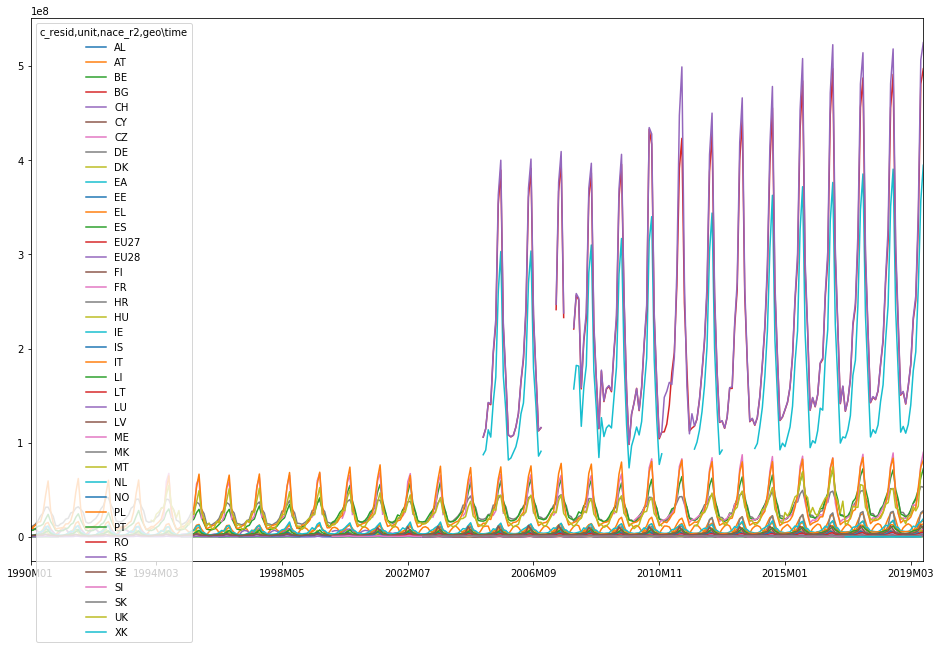

In [245]:
# It is obvious that a very large seasonal trend exists
# Unfortunately, not all data is available
# The massive spikes are all of europe combined
non_res_nights.plot()

In [259]:
non_res_nights_id = non_res_nights
non_res_nights_id = non_res_nights_id[non_res_nights_id.columns[~non_res_nights_id.columns.str.contains("EU2")]]
non_res_nights_id = non_res_nights_id[non_res_nights_id.columns[~non_res_nights_id.columns.str.contains("EA")]]

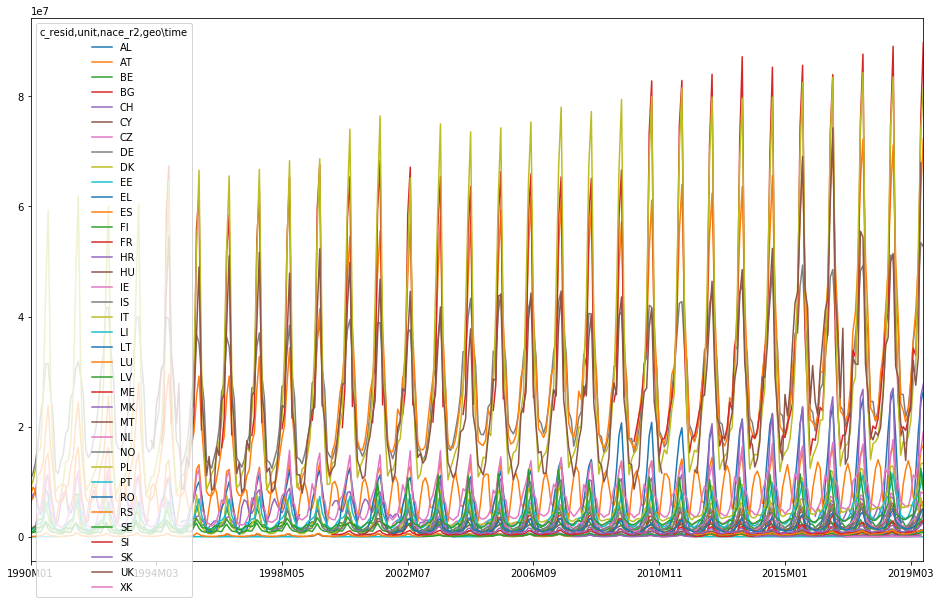

In [256]:
# Looking at the ones with the best data, it seems that several countries have far higher tourism numbers than others
# For the most part, the patterns are syncronized... Except for one
non_res_nights_id.plot()

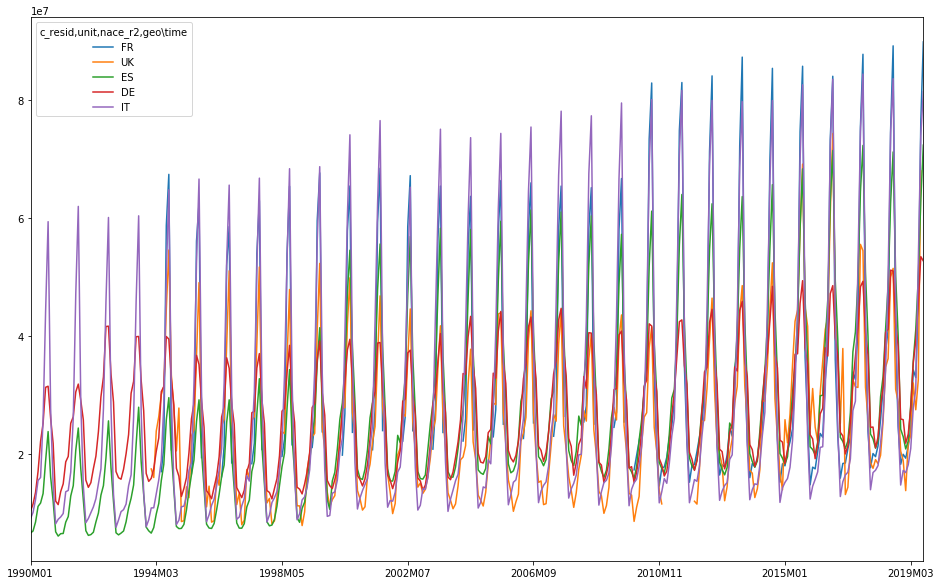

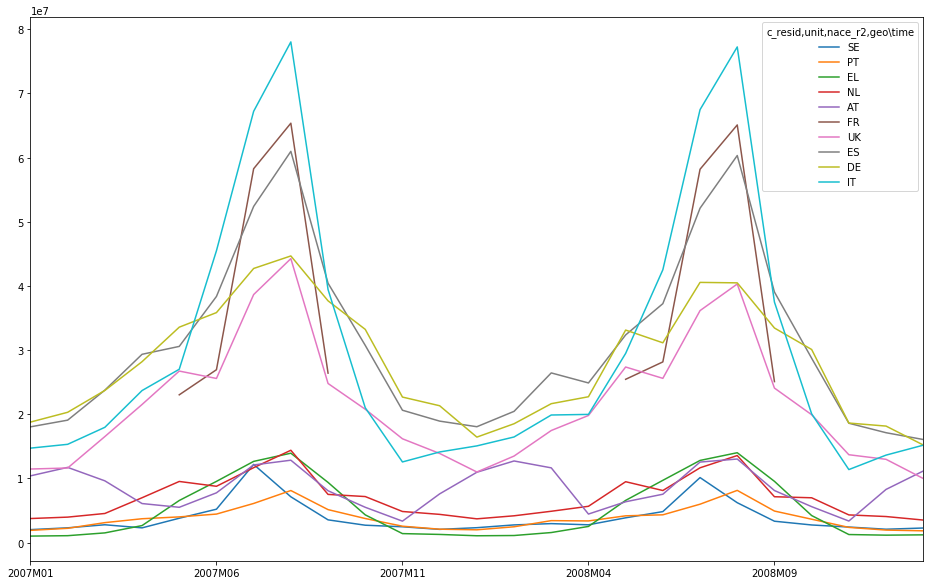

In [257]:
# Looking more closely, these top countries are Italy, France, Spain (ES), and Germany (DE)
# The tourism peaks are between June and September
non_res_nights_id[non_res_nights_id.sum().sort_values()[-5:].index].plot()
non_res_nights_id[non_res_nights_id.sum().sort_values()[-10:].index].loc["2007M01":"2009M01", :].plot()

In [269]:
qter_empl = pd.read_csv("data/tour_lfsq1r2.tsv.gz", delimiter="\t", index_col=[0], na_values=[': ', ":"]).T
qter_empl.sort_index(inplace=True)
qter_empl.index = qter_empl.index.str.strip()
qter_empl

"nace_r2,wstatus,worktime,unit,geo\time","H51,CFAM,FT,THS,CZ","H51,CFAM,FT,THS,DE","H51,CFAM,FT,THS,EA19","H51,CFAM,FT,THS,EU15","H51,CFAM,FT,THS,EU28","H51,CFAM,FT,THS,IE","H51,CFAM,FT,THS,IT","H51,CFAM,FT,THS,LU","H51,CFAM,FT,THS,NL","H51,CFAM,PT,THS,BE",...,"TOTAL,SELF,TOTAL,THS,NO","TOTAL,SELF,TOTAL,THS,PL","TOTAL,SELF,TOTAL,THS,PT","TOTAL,SELF,TOTAL,THS,RO","TOTAL,SELF,TOTAL,THS,RS","TOTAL,SELF,TOTAL,THS,SE","TOTAL,SELF,TOTAL,THS,SI","TOTAL,SELF,TOTAL,THS,SK","TOTAL,SELF,TOTAL,THS,TR","TOTAL,SELF,TOTAL,THS,UK"
2008Q1,NaN,NaN,: bc,: bc,: bc,NaN,: bc,NaN,: bc,NaN,...,189.2,2969.9,1211.4,1863.4,NaN,462.4,99.9,318.8,5365.3,3881.0 b
2008Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,189.3,3031.9,1198.8,2016.0,NaN,471.7,99.9,321.8,5674.6,3823.8
2008Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,184.3,2965.4,1202.5,2023.0,NaN,465.2,93.3,344.6,5700.5,3808.3
2008Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,191.3,2914.2,1181.1,1883.1,NaN,465.9,101.2,343.3,5587.8,3837.4
2009Q1,NaN,NaN,: c,: c,: c,: c,: c,NaN,NaN,NaN,...,195.0,2993.9,1167.6,1822.7,NaN,465.4,94.7,361.4,5567.3,3848.7
2009Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,197.2,3034.6,1160.5,1985.9,NaN,466.3,111.5,371.3,5671.6,3808.2
2009Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,194.6,2981.7,1132.6,2020.0,NaN,475.2,106.6,374.9,5662.6,3874.2
2009Q4,NaN,NaN,: c,: c,: c,NaN,NaN,: c,NaN,NaN,...,197.0,2906.1,1144.9,1857.5,NaN,478.1,107.8,362.7,5630.1,3921.1
2010Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,189.6,2941.4 b,1123.1,1835.5 b,NaN,482.7,113.4,371.5,5682.5,3953.3
2010Q2,NaN,NaN,: c,: c,: c,: c,NaN,NaN,NaN,NaN,...,194.0,2937.1,1078.1,2078.2,641.7,483.4,115.8,365.7,5828.5,3911.6


In [270]:
# Initial Cleaning

qter_empl = qter_empl.loc[qter_empl.index[qter_empl.index <= "2019M08"], :]
# The encoding for the columns is "subindustry, type of employee, full-time/part-time, THS (thousands), country"
# Currently interested in TOTAL,SAL,TOTAL,THS
qter_empl = qter_empl[qter_empl.columns[qter_empl.columns.str.contains("TOTAL,SAL,TOTAL,THS")]]
qter_empl.columns = qter_empl.columns.str.replace("TOTAL,SAL,TOTAL,THS,", "")
qter_empl = qter_empl.applymap(parsing_function)
qter_empl

"nace_r2,wstatus,worktime,unit,geo\time",AT,BE,BG,CH,CY,CZ,DE,DK,EA19,EE,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
2008Q1,3397.4,3813.8,2879.6,NaN,304.1,4161.1,33388.0,2556.2,121791.0,602.3,...,2292.8,11941.4,3849.8,6234.1,NaN,4044.3,832.2,2063.3,12388.9,25434.9
2008Q2,3457.2,3780.8,2945.3,3557.3,307.9,4195.2,33727.6,2609.0,123082.1,606.9,...,2325.3,12007.5,3902.4,6290.9,NaN,4140.3,846.5,2075.3,13229.5,25541.6
2008Q3,3493.6,3829.9,2986.7,NaN,304.0,4206.6,34466.8,2623.4,124151.5,607.7,...,2338.4,12318.3,3864.5,6394.2,NaN,4198.4,881.4,2120.5,13189.5,25600.7
2008Q4,3464.4,3829.4,2963.6,NaN,310.0,4220.4,34615.6,2613.1,123187.9,600.9,...,2313.9,12446.8,3870.7,6348.3,NaN,4076.5,861.6,2117.5,12894.4,25502.1
2009Q1,3395.4,3740.2,2882.6,NaN,301.6,4123.8,33695.9,2539.8,120424.9,562.4,...,2294.9,12119.1,3806.2,6257.1,NaN,3991.8,827.4,2026.3,11908.8,25188.0
2009Q2,3435.8,3784.6,2881.3,3617.1,306.9,4118.6,33922.1,2528.1,120908.6,544.2,...,2311.4,12196.7,3793.2,6232.3,NaN,4048.0,815.5,2003.4,12855.4,24955.0
2009Q3,3472.9,3771.7,2851.9,NaN,308.3,4089.1,33866.0,2526.1,120652.0,544.7,...,2296.1,12361.9,3755.7,6264.9,NaN,4062.2,825.8,1988.1,13049.7,25038.5
2009Q4,3452.0,3769.4,2774.5,NaN,311.9,4096.3,34564.1,2452.1,120449.7,526.2,...,2286.7,12362.4,3743.0,6097.8,NaN,3971.2,818.8,1962.8,13258.5,24987.0
2010Q1,3399.3,3820.5,2668.4,3490.2,312.2,3992.5,33185.6,2457.3,118208.0,506.2,...,2285.2,11674.2,3761.8,5631.8,NaN,3918.1,806.4,1906.9,12926.9,24698.0
2010Q2,3444.2,3829.1,2701.7,3544.3,320.7,4013.2,33454.5,2469.4,119245.0,513.7,...,2308.2,11925.8,3789.1,5713.5,1582.4,4037.6,807.6,1943.7,13997.8,24919.3


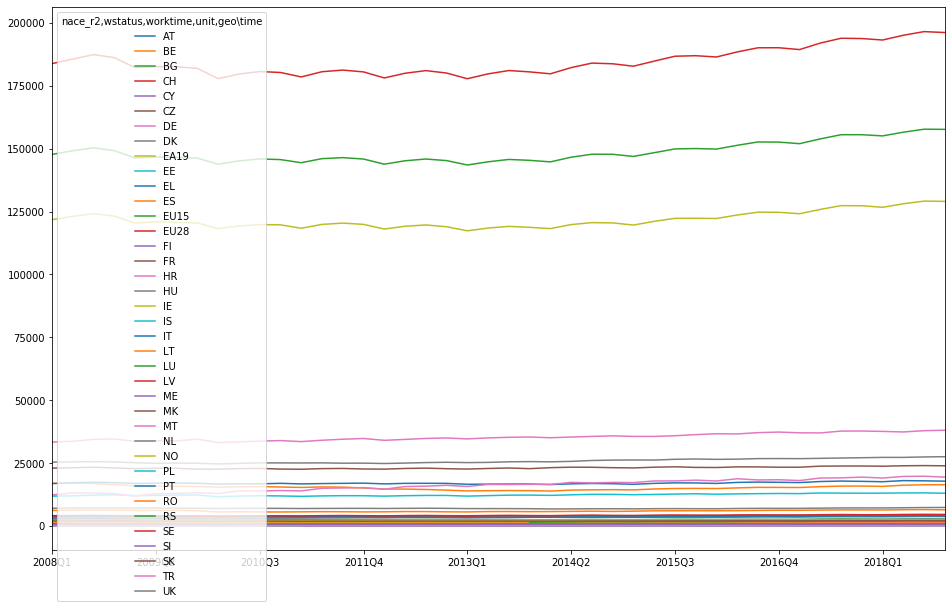

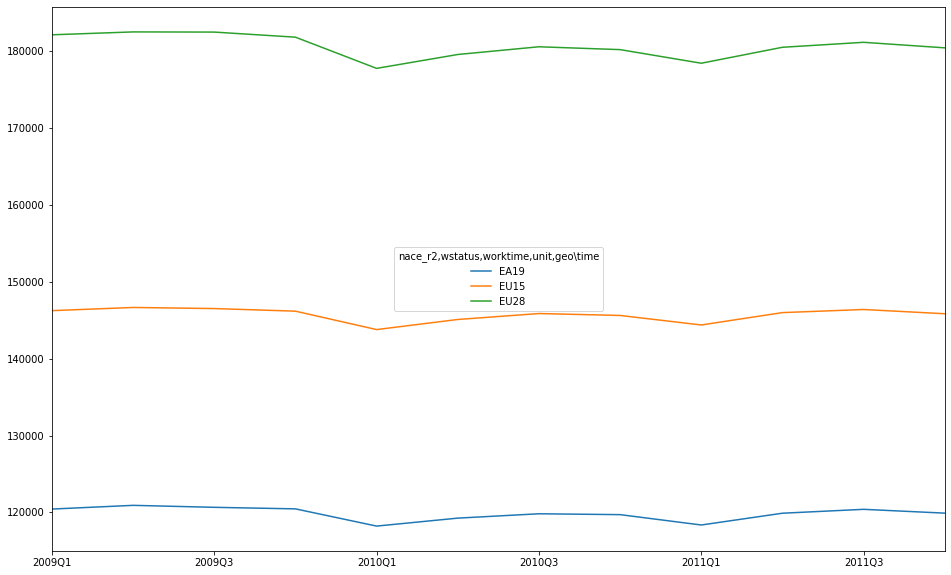

In [281]:
# It appears that season trends also appear in employment rates
# The full-time employment rates drop around Q1, and rises in Q3 and Q4
# Notes that Q1-4 are the 1st of January, April, July, and October
# Thus the height of tourism generally happens between Q3 and Q4
# It's (thankfully) not as drastic as as changes in tourism rates
qter_empl.plot()
qter_empl.loc[:,qter_empl.max(axis=0) > 100000]["2009":"2012"].plot()

### What to do in the next milestone
* Analyze the trend in more years
* Investigate in the significant outliers
* Maybe also investigate in whether a more developed nation attracts more tourism as well

In [278]:
import pandas as pd
import numpy as np

# Questions:

## 1. How factors such as sex, age, education, income and employment affect the participation of people in tourism ?
here we will be considering sex

## Cleaning

Meta Data :
https://ec.europa.eu/eurostat/web/tourism/methodology

In [279]:
# read  and clean

orig_sex = pd.read_csv('data/tour_dem_tosex.tsv', sep='\t')

def clean(data):
    # remove white spaces
    data.columns = data.columns.str.strip() # remove space from column name
    data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

    # remove flags from numeric columns
    data.iloc[:,1:] = data.iloc[:,1:].applymap(lambda x: x.strip('bepucfrzdns').strip() if isinstance(x, str) else x)

    # replace ':' with NAN
    data.replace(':', np.NaN, inplace=True)

    # cast columns to number (it will be float since we also have percentages)
    data.iloc[:,1:] = data.iloc[:,1:].applymap(lambda x: pd.to_numeric(x))
    
    return data

orig_sex = clean(orig_sex)

In [280]:
# turn the first column into different columns 'specs'
specs = orig_sex.iloc[:,0].str.split(',', expand=True)
specs.columns = ['unit', 'duration', 'partner', 'sex', 'geo_time']
# now join with the numeric data
sex_number = pd.concat([specs, orig_sex.iloc[:,1:]], axis=1)
sex_number.sample()

,unit,duration,partner,sex,geo_time,2018,2017,2016,2015,2014,...,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994
10,NR,N1-3,WORLD,F,EL,621516,591393,505342,570373,567659,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
# turn country codes into names
country_info = pd.read_excel('data/country_info.xls')
country_info = country_info.set_index('CODE')
country_info = country_info.iloc[:,0:1]

# turn the dataframe into dictionary
di = country_info.to_dict()['LIBEN']
# turn code into name
sex_number['geo_time'] = sex_number['geo_time'].map(di).fillna(sex_number['geo_time'])


for now we will concentrate on the most general data possible:

* unit: NR (number of people)
* duration: N_GE1 (1 nights or more)
* partner: OUT (outbound trips; trips of non-citizens to this country)
* sex and geo all of the options
    

In [282]:
selection = (sex_number.unit=='NR') & (sex_number.duration=='N_GE1') & (sex_number.partner=='OUT')
sex_number = sex_number[selection]

# drop spec columns
sex_number.drop(labels=['unit', 'duration', 'partner'], axis =1, inplace=True)

In [283]:
sex_number.sample()

,sex,geo_time,2018,2017,2016,2015,2014,2013,2012,2011,...,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994
355,F,Slovakia,267920,385597,435685,376819,425940,440071,658018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


remove the flags from numbers

below we can see that years 2011 and before have no data available.
so just drop them.

In [284]:
sex_number.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 321 to 428
Data columns (total 27 columns):
sex         108 non-null object
geo_time    108 non-null object
2018        96 non-null object
2017        87 non-null object
2016        90 non-null object
2015        90 non-null object
2014        90 non-null object
2013        87 non-null object
2012        84 non-null object
2011        0 non-null object
2010        0 non-null object
2009        0 non-null object
2008        0 non-null object
2007        0 non-null object
2006        0 non-null object
2005        0 non-null object
2004        0 non-null object
2003        0 non-null object
2002        0 non-null object
2001        0 non-null object
2000        0 non-null object
1999        0 non-null object
1998        0 non-null object
1997        0 non-null object
1996        0 non-null object
1995        0 non-null object
1994        0 non-null object
dtypes: object(27)
memory usage: 23.6+ KB


In [285]:
sex_number = sex_number[['sex', 'geo_time', '2018', '2017', '2016', '2015', '2014', '2013', '2012']]

In [286]:
sex_number.head()

,sex,geo_time,2018,2017,2016,2015,2014,2013,2012
321,F,Austria,NaN,838835,918136,851988,932835,772313,728926
322,F,Belgium,1.38208e+06,1.38168e+06,2.0375e+06,1.80593e+06,1.8944e+06,1.93193e+06,1.48748e+06
323,F,Bulgaria,79698,71317,60132,80382,46790,64067,58430
324,F,Switzerland,1.3868e+06,1.38865e+06,1.33264e+06,1.18564e+06,1.17348e+06,1.08165e+06,999580
325,F,Cyprus,71825,73809,71415,63822,67892,69677,120015


# EDA

In [287]:
import matplotlib.pyplot as plt

### Female:

In [288]:
female = sex_number[sex_number.sex == 'F']
female.set_index('geo_time', inplace=True)
# sort columns
female = female.reindex(sorted(female.columns), axis=1)
# take the rows EU25/27/28 and EA out also column sex
female = female.drop(['EU25', 'EU27', 'EU28', 'EA'], axis=0).drop('sex',axis=1)

female.head()

,2012,2013,2014,2015,2016,2017,2018
geo_time,,,,,,,
Austria,728926,772313,932835,851988,918136,838835,NaN
Belgium,1.48748e+06,1.93193e+06,1.8944e+06,1.80593e+06,2.0375e+06,1.38168e+06,1.38208e+06
Bulgaria,58430,64067,46790,80382,60132,71317,79698
Switzerland,999580,1.08165e+06,1.17348e+06,1.18564e+06,1.33264e+06,1.38865e+06,1.3868e+06
Cyprus,120015,69677,67892,63822,71415,73809,71825


In [289]:
# normalize by dividing by year total
female_normalized = female / female.sum(axis=0)

We will plot the total percentages/number of female tourists to these countries in 6 plot :
1. with less than total 0.05 percent of travelers
2. between 0.05% and 0.3%
3. more than 0.3%

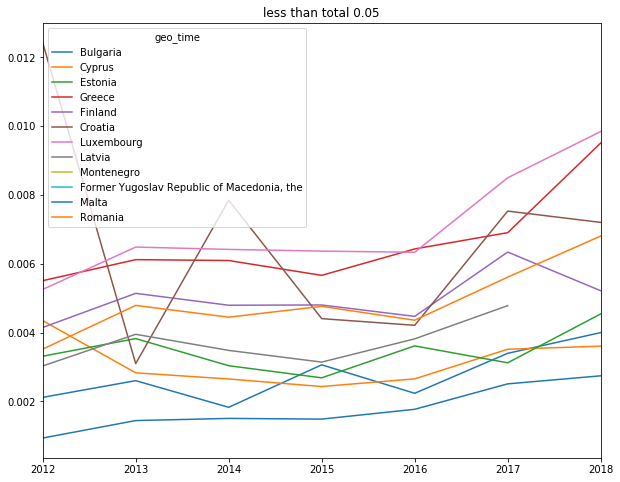

In [290]:
female_normalized[female_normalized.sum(axis=1) < 0.05].T.plot(figsize=(10,8))
plt.title('less than total 0.05');

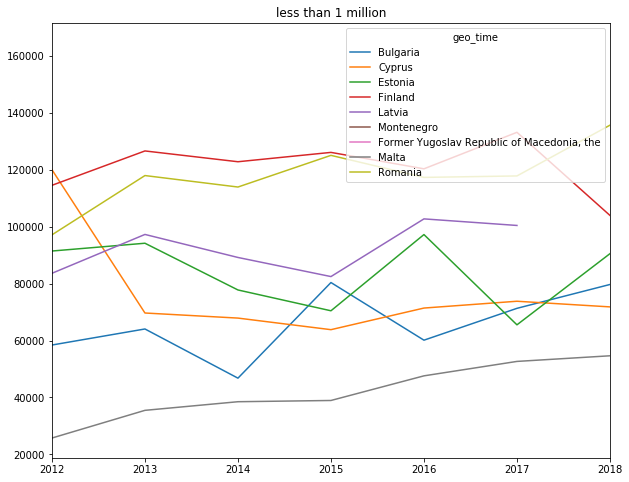

In [291]:
female[female.sum(axis=1) < 10**6].T.plot(figsize=(10,8))
plt.title('less than 1 million');

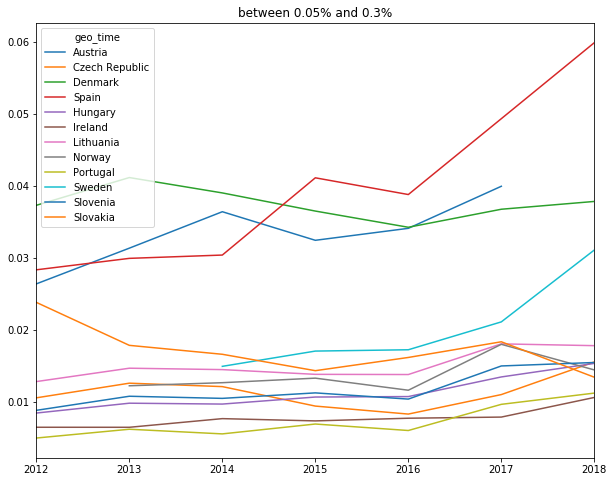

In [292]:
female_normalized[(female_normalized.sum(axis=1) >= 0.05) & (female_normalized.sum(axis=1) <=  0.3 )].T.plot(figsize=(10,8))
plt.title('between 0.05% and 0.3%');

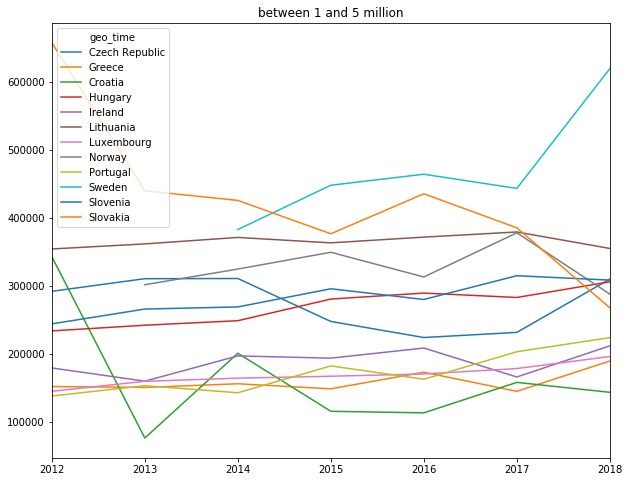

In [293]:
female[(female.sum(axis=1) >= 10**6) & (female.sum(axis=1) <=  5*10**6 )].T.plot(figsize=(10,8))
plt.title('between 1 and 5 million');

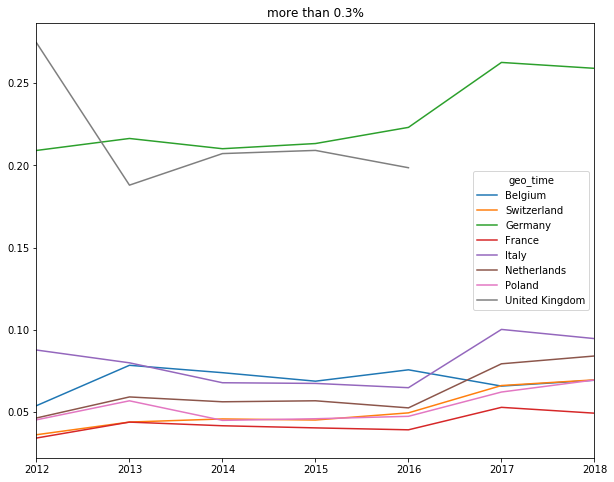

In [294]:
female_normalized[ (female_normalized.sum(axis=1) >  0.3 )].T.plot(figsize=(10,8))
plt.title('more than 0.3%');

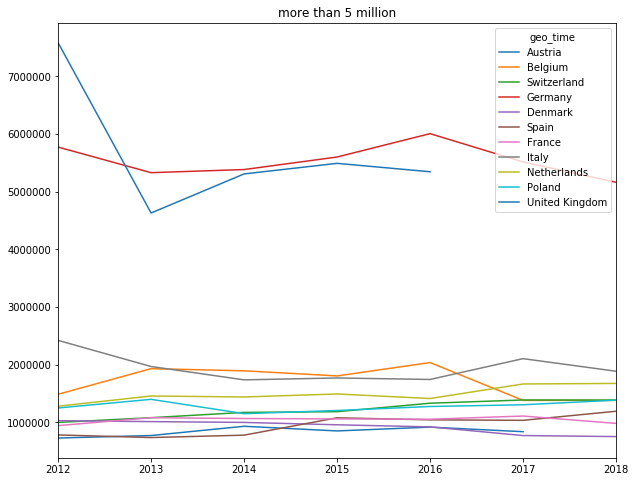

In [295]:
female[ (female.sum(axis=1) >  5*10**6 )].T.plot(figsize=(10,8))
plt.title('more than 5 million');

**Conclusion**:
we can clearly see that UK and and Germany have more female travelers and this is becasuse the total number of travellers to thses countries are much higer than the rest.

#### in sum of all years available which coutries had the most female tourists ?

below we see the top ten famous destinations for females.

In [296]:
female_top = female.sum(axis=1).sort_values(ascending=False).head(10)
female_top

geo_time
Germany           38775572.0
United Kingdom    28361310.0
Italy             13636545.0
Belgium           11921004.0
Netherlands       10429054.0
Poland             8974474.0
Switzerland        8548444.0
France             7300900.0
Spain              6652214.0
Denmark            6450076.0
dtype: float64

and least famous :

In [297]:
female.sum(axis=1).sort_values(ascending=True).head(10)

geo_time
Montenegro                                          0.0
Former Yugoslav Republic of Macedonia, the     164642.0
Malta                                          293612.0
Bulgaria                                       460816.0
Cyprus                                         538455.0
Latvia                                         555748.0
Estonia                                        587151.0
Romania                                        824906.0
Finland                                        847514.0
Greece                                        1115367.0
dtype: float64

### Male:

In [298]:
male = sex_number[sex_number.sex == 'M']
male.set_index('geo_time', inplace=True)
# sort columns
male = male.reindex(sorted(male.columns), axis=1)
# take the rows EU25/27/28 and EA out also column sex
male = male.drop(['EU25', 'EU27', 'EU28', 'EA'], axis=0).drop('sex',axis=1)


In [299]:
male.head()

,2012,2013,2014,2015,2016,2017,2018
geo_time,,,,,,,
Austria,795708,764995,808542,859790,823124,839802,NaN
Belgium,1.50871e+06,1.80892e+06,1.77008e+06,1.62195e+06,1.72684e+06,1.38139e+06,1.3391e+06
Bulgaria,52560,57767,38456,59004,56773,70245,63791
Switzerland,1.06231e+06,1.01319e+06,1.07759e+06,1.16443e+06,1.24940e+06,1.1947e+06,1.19737e+06
Cyprus,108453,63370,54986,52913,61884,68387,66496


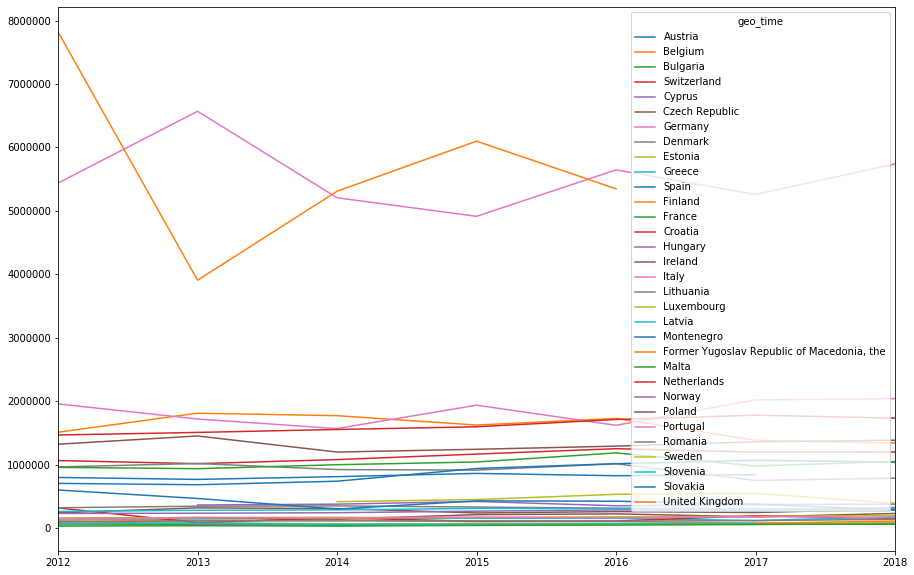

In [300]:
male.T.plot(figsize=(15,10))

In [301]:
male_top = male.sum(axis=1).sort_values(ascending=False).head(10)

In [302]:
male_top 

geo_time
Germany           38775370.0
United Kingdom    28484290.0
Italy             12851704.0
Netherlands       11338411.0
Belgium           11157004.0
Poland             9237432.0
Switzerland        7958994.0
France             7133047.0
Denmark            6355588.0
Spain              6176172.0
dtype: float64

#### **Next steps:** 
    
1. we can use ARIMA model to train a model for each country to predict the time series data (but few data points are avilable for each country)

2. if we can get access to the micro data we can use features of people (e.g. sex, education, etc.) to predict their destination.

## How sex, education, etc. affect the money spent by tourists? Are there specific target countries for each group of people?

In [303]:
#read
money_sex = pd.read_csv('data/tour_dem_exsex.tsv', sep='\t')

# use clean function in the pervious section
money_sex = clean(money_sex)

In [304]:
money_sex

,"unit,purpose,duration,partner,sex,geo\time",2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,"THS_EUR,PERS,N1-3,DOM,F,AT",993188,914896,900130,868983,863939,784730,750987,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"THS_EUR,PERS,N1-3,DOM,F,BE",180605,178816,142532,178840,116963,151602,121594,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"THS_EUR,PERS,N1-3,DOM,F,BG",70751.4,79555.7,55856.4,48412.8,80984.2,64115.8,59012.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"THS_EUR,PERS,N1-3,DOM,F,CH",353121,437326,439730,488604,383337,392603,401727,340347,363488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"THS_EUR,PERS,N1-3,DOM,F,CY",70798.8,61388.3,59116.6,52394.8,52298.3,38349.1,31159.2,15068,15738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,"THS_NAC,TOTAL,N_GE4,WORLD,T,RO",NaN,7.13171e+06,6.01727e+06,5.65157e+06,5.3856e+06,5.50225e+06,5.50798e+06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4860,"THS_NAC,TOTAL,N_GE4,WORLD,T,SE",NaN,NaN,4.39111e+07,5.0663e+07,4.92731e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4861,"THS_NAC,TOTAL,N_GE4,WORLD,T,SI",948854,751559,813010,754819,677252,659538,683209,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4862,"THS_NAC,TOTAL,N_GE4,WORLD,T,SK",2.16758e+06,1.67139e+06,1.58345e+06,1.71472e+06,1.22118e+06,1.3908e+06,1.92374e+06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
# turn the first column into different columns 'specs'
specs = money_sex.iloc[:,0].str.split(',', expand=True)
specs.columns = ['unit', 'purpose', 'duration', 'partner', 'sex', 'geo_time']
# now join with the numeric data
money_sex = pd.concat([specs, money_sex.iloc[:,1:]], axis=1)


In [306]:
money_sex.sample()

,unit,purpose,duration,partner,sex,geo_time,2018,2017,2016,2015,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
1794,THS_EUR,TOTAL,N1-3,OUT,T,NO,2.33806e+06,2.096e+06,2.28242e+06,2.15361e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [307]:
# turn country codes into names
# turn code into name
money_sex['geo_time'] = money_sex['geo_time'].map(di).fillna(money_sex['geo_time'])


for now we will concentrate on the most general data possible (except purpose):

* unit: THS_EUR (thousands of euros)
* duration: N_GE1 (1 nights or more)
* partner: OUT (outbound trips; trips of non-citizens to this country)
* purpose: PERS (personal)
* sex and geo all of the options
    

In [308]:
selection = (money_sex.unit=='THS_EUR') & (money_sex.duration=='N_GE1') & (money_sex.partner=='OUT') & (money_sex.purpose=='PERS')
money_sex = money_sex[selection]

# drop spec columns
money_sex.drop(labels=['unit', 'duration', 'partner', 'purpose'], axis =1, inplace=True)

In [309]:
money_sex.sample()

,sex,geo_time,2018,2017,2016,2015,2014,2013,2012,2011,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
381,F,Malta,213863,186060,187937,131091,133621,131442,116178,96431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


below we can see that years 2002 and before only half the countries or less have available data.
we can drop them. but we will keep them until handelling them would be necessary.

In [310]:
money_sex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 361 to 451
Data columns (total 31 columns):
sex         91 non-null object
geo_time    91 non-null object
2018        78 non-null object
2017        84 non-null object
2016        87 non-null object
2015        87 non-null object
2014        87 non-null object
2013        87 non-null object
2012        81 non-null object
2011        68 non-null object
2010        70 non-null object
2009        65 non-null object
2008        60 non-null object
2007        65 non-null object
2006        54 non-null object
2005        50 non-null object
2004        51 non-null object
2003        44 non-null object
2002        29 non-null object
2001        28 non-null object
2000        26 non-null object
1999        23 non-null object
1998        23 non-null object
1997        19 non-null object
1996        9 non-null object
1995        15 non-null object
1994        16 non-null object
1993        15 non-null object
1992        15 non-null obj

## EDA

male vs female spending:

In [311]:
money_female =  money_sex[money_sex.sex=='F']
# sort columns
money_female = money_female.reindex(sorted(money_female.columns), axis=1)

female_total = money_female.sum()[:29].sum()

In [312]:
money_male =  money_sex[money_sex.sex=='M']
# sort columns
money_male = money_male.reindex(sorted(money_male.columns), axis=1)

male_total = money_male.sum()[:29].sum()

<BarContainer object of 2 artists>

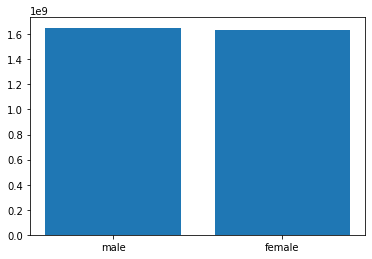

In [313]:
plt.bar(['male','female'],[male_total, female_total])

In [314]:
[male_total, female_total]

[1652071621.3899999, 1631929211.3899999]

In [315]:
money_male.sum()[:29].std()

38929561.881667495

In [316]:
money_female.sum()[:29].std()

39290134.79041095

so there is no significant difference between the two genders in spending.

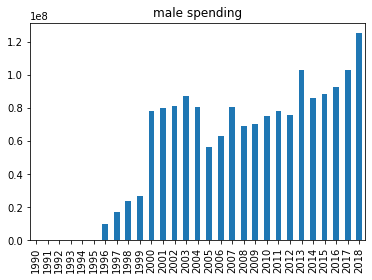

In [317]:
money_male.sum()[:29].plot.bar()
plt.title('male spending');

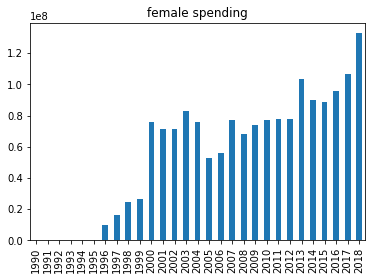

In [318]:
money_female.sum()[:29].plot.bar()
plt.title('female spending');

Text(0.5, 1.0, 'Money spent by males thousands of euros')

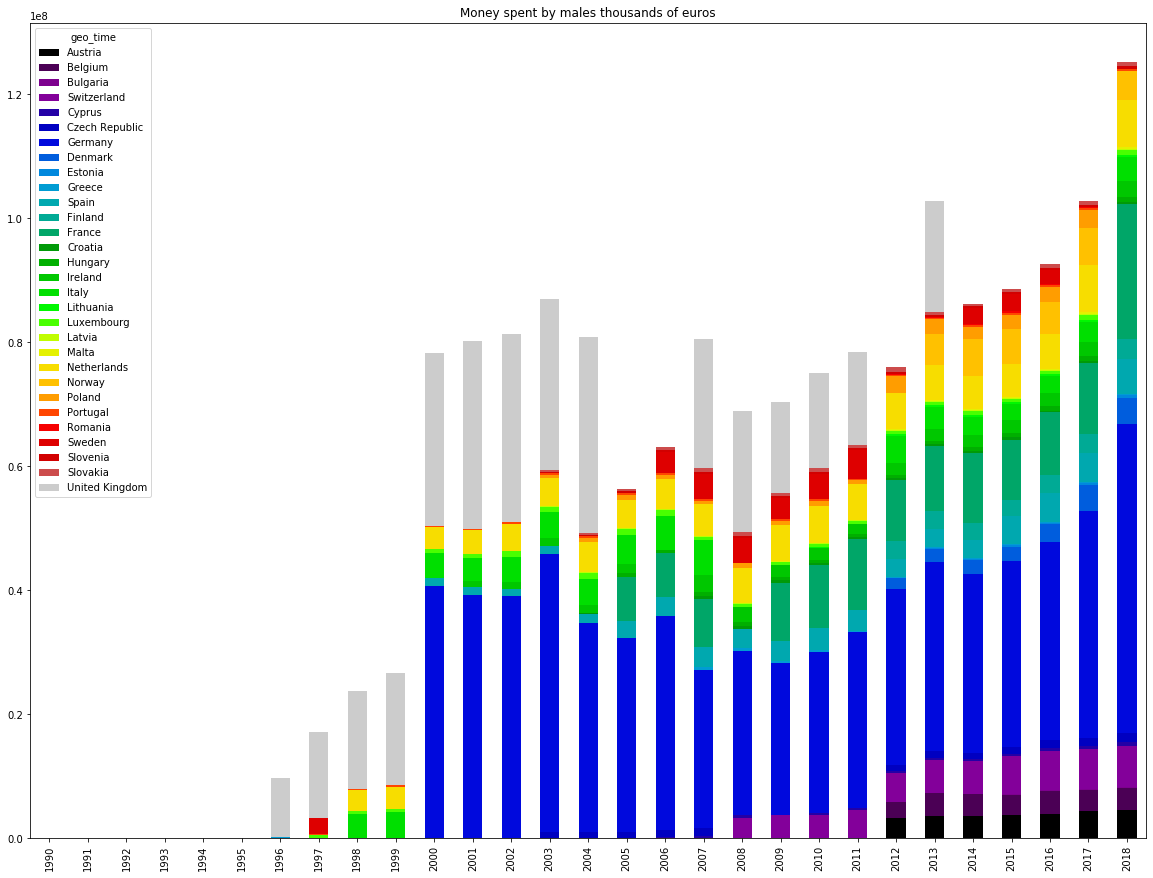

In [319]:
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 30))  #Pastel1 gist_rainbow
money_male.set_index('geo_time').drop('sex', axis=1).T.plot.bar(stacked=True, figsize=(20,15), color=colors)
plt.title('Money spent by males thousands of euros')

Text(0.5, 1.0, 'Money spent by females thousands of euros')

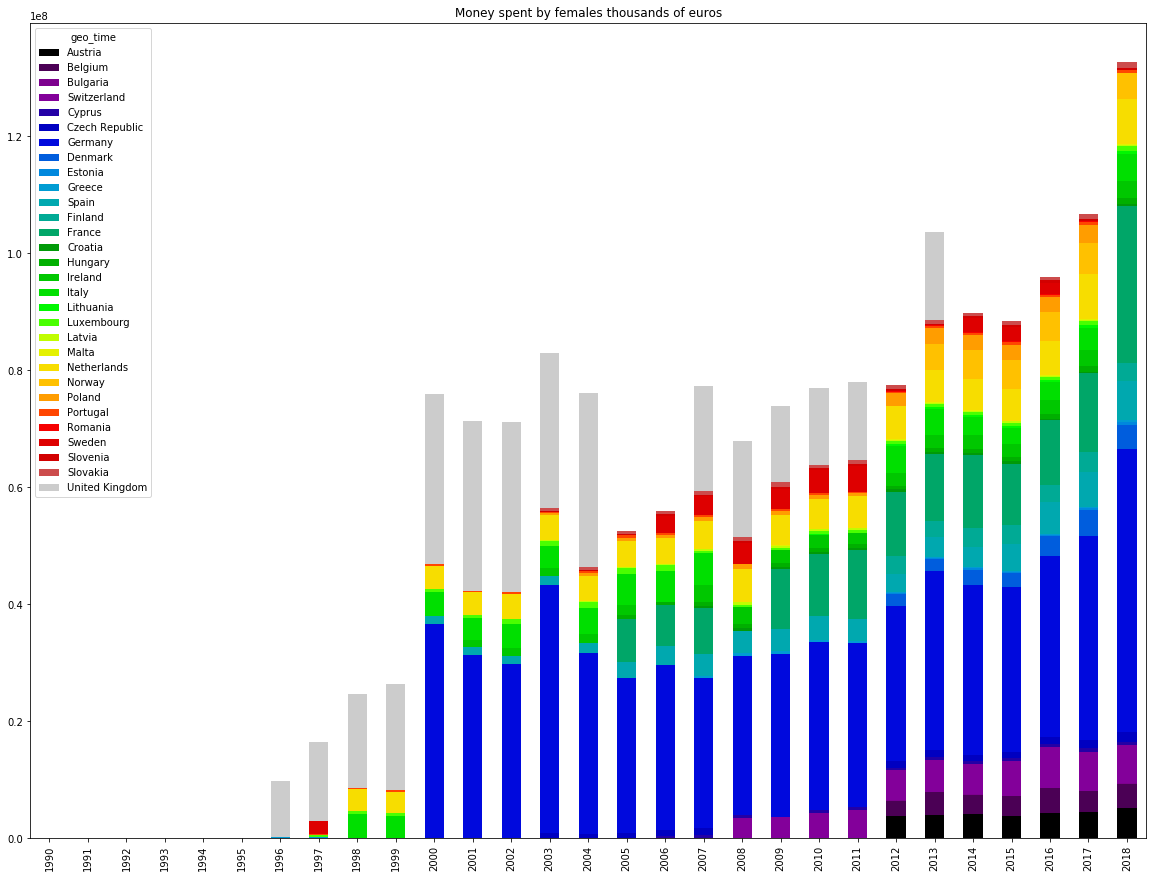

In [320]:
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 30))  #Pastel1 gist_rainbow
money_female.set_index('geo_time').drop('sex', axis=1).T.plot.bar(stacked=True, figsize=(20,15), color=colors)
plt.title('Money spent by females thousands of euros')

top ten countries females spent money in:

In [321]:
money_female = money_female.set_index('geo_time').drop('sex', axis=1)

In [322]:
money_female.sum(axis=1).sort_values(ascending=False).head(10)

geo_time
Germany           5.918584e+08
United Kingdom    2.894117e+08
France            1.519891e+08
Netherlands       1.062712e+08
Italy             7.044132e+07
Spain             6.526663e+07
Switzerland       5.813414e+07
Ireland           3.674515e+07
Sweden            3.017214e+07
Austria           2.969247e+07
dtype: float64

In [323]:
money_male = money_male.set_index('geo_time').drop('sex', axis=1)

In [324]:
money_male.sum(axis=1).sort_values(ascending=False).head(10)

geo_time
Germany           6.305603e+08
United Kingdom    3.081493e+08
France            1.371139e+08
Netherlands       1.092657e+08
Italy             6.757808e+07
Spain             5.709939e+07
Switzerland       5.639498e+07
Sweden            3.349369e+07
Norway            3.261406e+07
Ireland           3.182447e+07
dtype: float64

we see that Norway is only in the male top 10 spending while Austria is only in female top 10 spendings.

### Next steps:
1. we can use the participation data and the spending to train a classifier for countries. this way we can use the weights to determin the target country of each group of people.

2. we again can use ARIMA to do timeseries prediction.

3. if we can get access to micro data we can do a predition task on types of people to predict their spending.